In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0  # You can choose from B0 to B7
from tensorflow.keras import layers, models, preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 30

In [3]:
train_ds = preprocessing.image_dataset_from_directory(
    r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\train_aug",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 28287 files belonging to 7 classes.


In [4]:
val_ds = preprocessing.image_dataset_from_directory(
    r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
test_ds = preprocessing.image_dataset_from_directory(
   r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 736 files belonging to 7 classes.
Found 726 files belonging to 7 classes.


In [5]:
class_names = train_ds.class_names
class_names

['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

In [6]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 4,379,306
Trainable params: 329,735
Non-trainable params: 4,049,571
________________________________________

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/30
884/884 [==============================] - 46s 43ms/step - loss: 0.2410 - accuracy: 0.9199 - val_loss: 0.2397 - val_accuracy: 0.9348
Epoch 2/30
884/884 [==============================] - 37s 42ms/step - loss: 0.0945 - accuracy: 0.9689 - val_loss: 0.1719 - val_accuracy: 0.9538
Epoch 3/30
884/884 [==============================] - 38s 43ms/step - loss: 0.0715 - accuracy: 0.9763 - val_loss: 0.2212 - val_accuracy: 0.9511
Epoch 4/30
884/884 [==============================] - 37s 42ms/step - loss: 0.0621 - accuracy: 0.9792 - val_loss: 0.2413 - val_accuracy: 0.9429
Epoch 5/30
884/884 [==============================] - 37s 42ms/step - loss: 0.0500 - accuracy: 0.9831 - val_loss: 0.2087 - val_accuracy: 0.9647
Epoch 6/30
884/884 [==============================] - 37s 42ms/step - loss: 0.0495 - accuracy: 0.9833 - val_loss: 0.2053 - val_accuracy: 0.9565
Epoch 7/30
884/884 [==============================] - 38s 43ms/step - loss: 0.0432 - accuracy: 0.9856 - val_loss: 0.2206 - val_accuracy:

In [9]:
model.save_weights(r"C:\Users\Hp\Desktop\New folder\Amit\Notebooks\DL results\EfficientB0_Rice_Pest_aug_model_weights.h5")

In [10]:
model_save_path = r"C:\Users\Hp\Desktop\New folder\Amit\Notebooks\DL results\EfficientB0_Rice_pest_aug_SavedModel"
tf.saved_model.save(model, model_save_path)

INFO:tensorflow:Assets written to: C:\Users\Hp\Desktop\New folder\Amit\Notebooks\DL results\EfficientB0_Rice_pest_aug_SavedModel\assets


INFO:tensorflow:Assets written to: C:\Users\Hp\Desktop\New folder\Amit\Notebooks\DL results\EfficientB0_Rice_pest_aug_SavedModel\assets


In [11]:
# Evaluate on validation dataset
scores_val = model.evaluate(val_ds)
print(f"Validation loss: {scores_val[0]}, Validation accuracy: {scores_val[1]}")

# Evaluate on test dataset
scores_test = model.evaluate(test_ds)
print(f"Test loss: {scores_test[0]}, Test accuracy: {scores_test[1]}")

# Evaluate on training dataset
scores_train = model.evaluate(train_ds)
print(f"Training loss: {scores_train[0]}, Training accuracy: {scores_train[1]}")

23/23 [==============================] - 1s 40ms/step - loss: 0.2848 - accuracy: 0.9620
Validation loss: 0.28478389978408813, Validation accuracy: 0.9619565010070801
23/23 [==============================] - 1s 40ms/step - loss: 0.2862 - accuracy: 0.9490
Test loss: 0.28624415397644043, Test accuracy: 0.9490358233451843
884/884 [==============================] - 36s 41ms/step - loss: 0.0013 - accuracy: 0.9994
Training loss: 0.0012575308792293072, Training accuracy: 0.9994343519210815


In [12]:
# Define the data
data = {
    'Metric': ['Training Loss', 'Training Accuracy' ,'Validation Loss', 'Validation Accuracy', 'Test Loss', 'Test Accuracy'],
    'Score': [scores_train[0], scores_train[1], scores_val[0], scores_val[1], scores_test[0], scores_test[1]]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('EfficientNetB0_evaluation_results_Rice_Pest_aug.csv', index=False)

print("Evaluation results saved to 'evaluation_results.csv'.")

Evaluation results saved to 'evaluation_results.csv'.


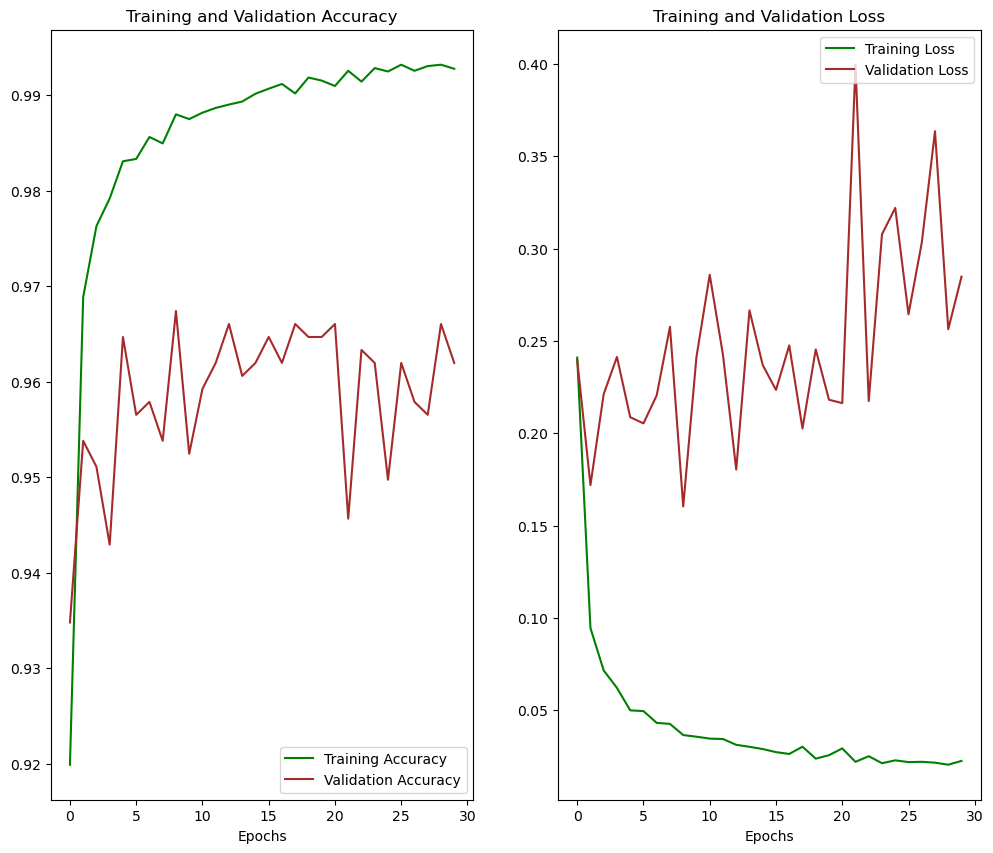

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='green')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='brown')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # Adding x-axis label

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='green')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='brown')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  # Adding x-axis label

plt.savefig("EfficientNetB0 Accuracy and Loss_Rice_Pest_aug.png", bbox_inches='tight', dpi=2000)
plt.show()

In [14]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print (predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
    print(predicted_class, confidence)

first image to predict
actual label: Demsel Fly
1/1 [==============================] - 1s 1s/step
predicted label: Demsel Fly


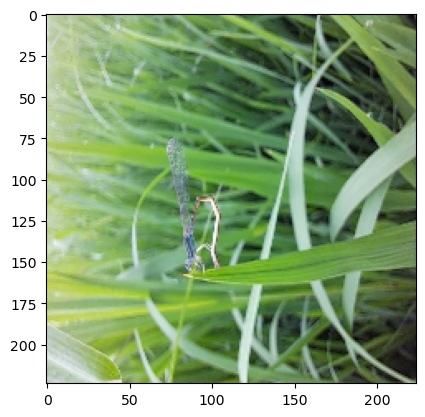

In [15]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

1/1 [==============================] - 1s 975ms/step


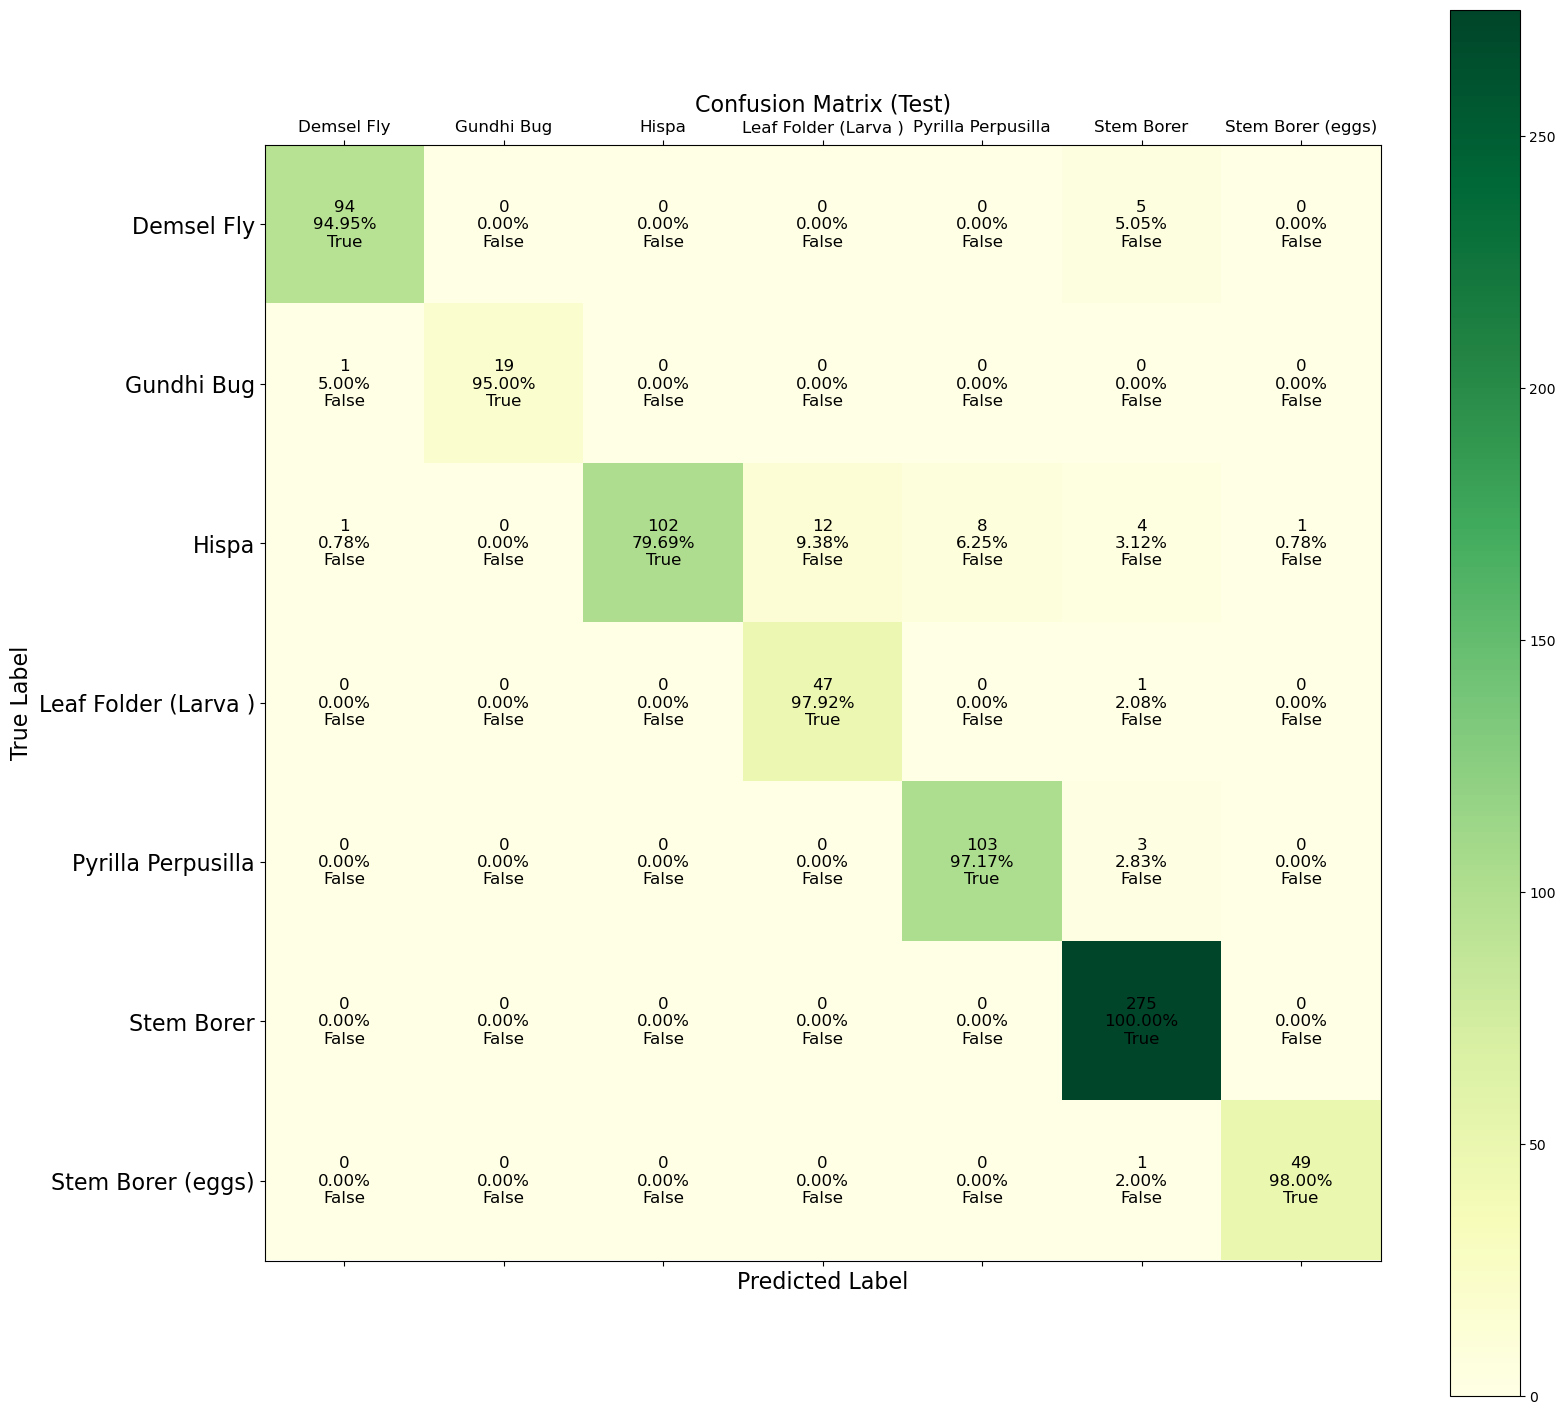

In [16]:
import pandas as pd
# Initialize empty lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset to obtain true and predicted labels
for images_batch, labels_batch in test_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch)  # Use labels directly without argmax
    y_pred.extend(np.argmax(batch_predictions, axis=1))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Map class indices to class names
class_names = ['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

# Calculate confidence percentages
confidence_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Map indices to class names for actual and predicted labels
y_true_names = [class_names[i] for i in y_true]
y_pred_names = [class_names[i] for i in y_pred]

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Actual Label': y_true_names,
    'Predicted Label': y_pred_names,
    'Confidence Percentage': [confidence_percentages[y, x] * 100 for x, y in zip(y_pred, y_true)],
    'Wrong Prediction': [1 if (true_label != pred_label) else 0 for true_label, pred_label in zip(y_true, y_pred)]
})

# Display the confusion matrix with gaps between class labels
fig, ax = plt.subplots(figsize=(18, 18))
cax = ax.matshow(conf_matrix, cmap=plt.cm.YlGn) #YlGnBu, PuBuGn, YlOrBr  

# Add a little gap between the axis ticks for better readability
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)  # Set font size for x-axis labels
ax.set_yticklabels(class_names, fontsize=16)  # Set font size for y-axis labels
plt.xticks(rotation=0, ha='center')

# Add numbers and confidence percentages to the matrix blocks
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = f'{conf_matrix[i, j]:.0f}\n{confidence_percentages[i, j]*100:.2f}%'
        if i == j:  # Correct prediction
            text += '\nTrue'
        else:
            text += '\nFalse'
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=12)  # Set font size and color for text

# Add colorbar
plt.colorbar(cax)

plt.title("Confusion Matrix (Test)", fontsize=16)  # Set title font size
plt.xlabel("Predicted Label", fontsize=16)  # Set x-axis label font size
plt.ylabel("True Label", fontsize=16)  # Set y-axis label font size
plt.savefig("EfficientNetB0 Confusion Matrix Test_Rice_Pest_aug", bbox_inches='tight', dpi=2000)
plt.show()

# Save the results to a CSV file
results_df.to_csv('test_results_EfficientNetB0_Rice_Pest_aug.csv', index=False)

In [17]:
# Let's assume you have a pre-trained model named 'model'
# Get one batch of images and labels from the test dataset
for test_images, test_labels in test_ds.take(1):
    break

# Make predictions
logits = model(test_images)
test_predictions = tf.argmax(logits, axis=1)

# Convert to numpy for easier handling in plotting
test_images = test_images.numpy()
test_labels = test_labels.numpy()
test_predictions = test_predictions.numpy()

In [18]:
test_images = []
test_labels = []
predictions = []

# Assuming 'test_ds' is your testing dataset
for images, labels in test_ds.take(-1):  # Take all batches in the dataset
    preds = model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

# Convert lists to numpy arrays for easier handling
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_predictions = np.array(predictions)

1/1 [==============================] - 0s 25ms/step


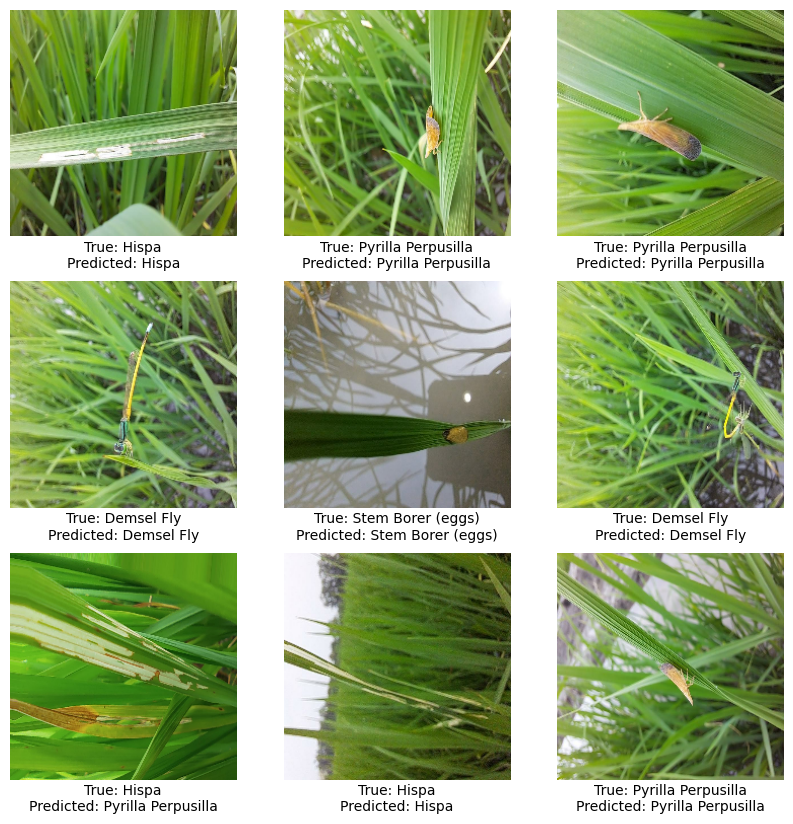

In [19]:
# Select random indices
random_indices = np.random.choice(test_images.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[test_predictions[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", pad=10,fontsize=10, y=-0.2)
    plt.axis("off")

plt.savefig("EfficientNetB0_True and Predicted label of Rice_Pest_aug",bbox_inches='tight', dpi=2000)
plt.show()

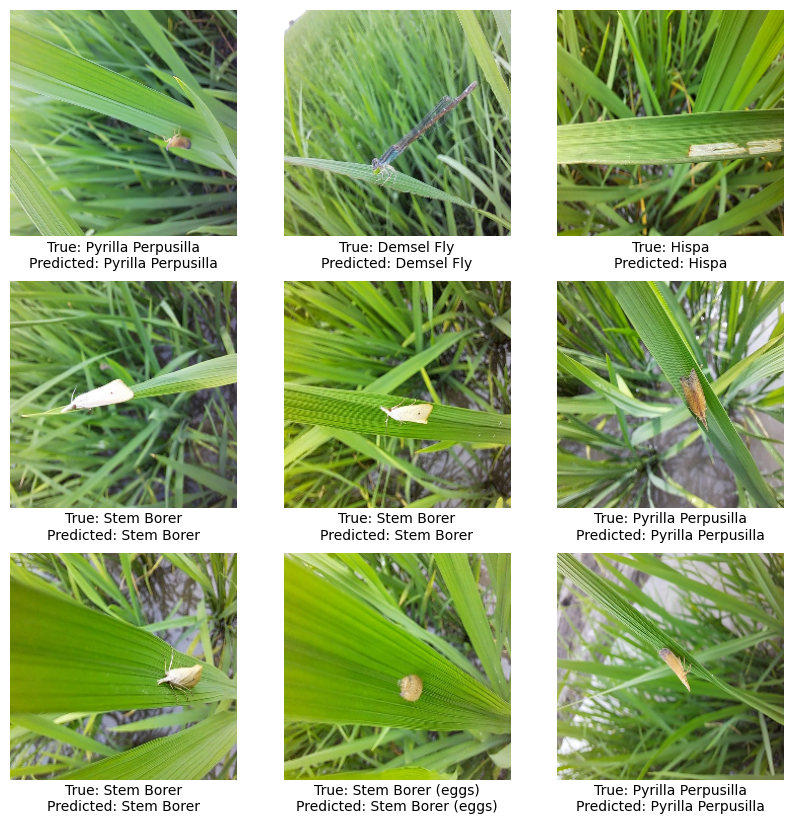

In [20]:
# Select random indices
random_indices = np.random.choice(test_images.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[test_predictions[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", pad=10, fontsize=10, y=-0.2)  # Adjust y position
    plt.axis("off")

plt.savefig("EfficientNetB0_True and Predicted label of Rice_Pest_aug1", bbox_inches='tight', dpi=2000)
plt.show()

In [21]:
# Assuming `model` is your trained model

test_labels = []
test_predictions = []

for images, labels in test_ds:
    preds = model.predict(images)
    test_predictions.extend(np.argmax(preds, axis=1))
    test_labels.extend(labels.numpy())

test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)

# Assuming class_names are extracted correctly from the dataset directory
class_names = test_ds.class_names

1/1 [==============================] - 0s 25ms/step


In [22]:
from sklearn.metrics import precision_recall_fscore_support

In [23]:
# Compute precision, recall, f1 score, and other metrics
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_predictions, average=None, labels=np.arange(len(class_names)))
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='micro')
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='macro')
weighted_precision, weighted_recall, weighted_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Add micro, macro, and weighted averages to the DataFrame
metrics_df = metrics_df.append({
    'Class': 'Micro Average',
    'Precision': micro_precision,
    'Recall': micro_recall,
    'F1 Score': micro_f1_score
}, ignore_index=True)

metrics_df = metrics_df.append({
    'Class': 'Macro Average',
    'Precision': macro_precision,
    'Recall': macro_recall,
    'F1 Score': macro_f1_score
}, ignore_index=True)

metrics_df = metrics_df.append({
    'Class': 'Weighted Average',
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1 Score': weighted_f1_score
}, ignore_index=True)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics_EfficientNetB0_Rice_Pest_aug.csv', index=False)

# Print the DataFrame
print(metrics_df)

                  Class  Precision    Recall  F1 Score
0            Demsel Fly   0.979167  0.949495  0.964103
1            Gundhi Bug   1.000000  0.950000  0.974359
2                 Hispa   1.000000  0.796875  0.886957
3  Leaf Folder (Larva )   0.796610  0.979167  0.878505
4    Pyrilla Perpusilla   0.927928  0.971698  0.949309
5            Stem Borer   0.951557  1.000000  0.975177
6     Stem Borer (eggs)   0.980000  0.980000  0.980000
7         Micro Average   0.949036  0.949036  0.949036
8         Macro Average   0.947895  0.946748  0.944058
9      Weighted Average   0.953462  0.949036  0.948254


C:\Users\Hp\AppData\Local\Temp\ipykernel_14100\3120276035.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_14100\3120276035.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_14100\3120276035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


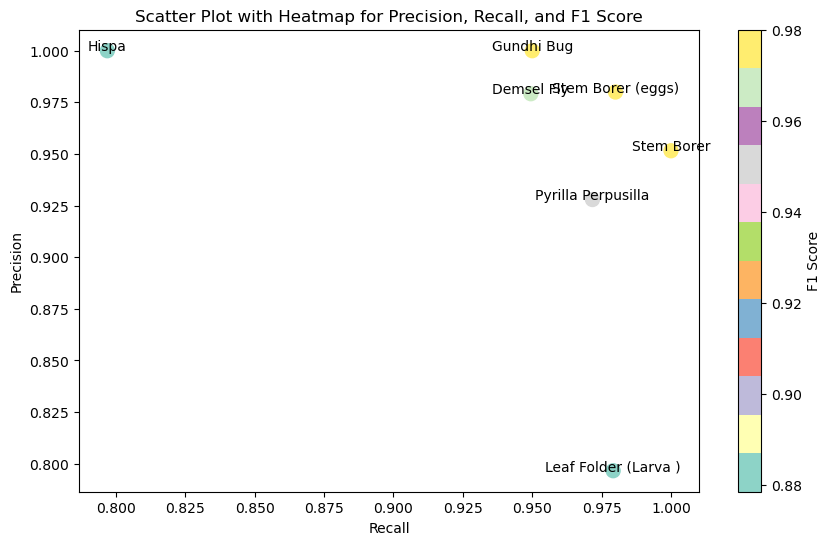

In [24]:
# Create a scatter plot with heatmaps and labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(recall, precision, c=f1_score, cmap='Set3', s=100)  # Adjusted the size
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.colorbar(label='F1 Score')

# Add labels for each point in the scatter plot
for i, label in enumerate(class_names):
    plt.text(recall[i], precision[i], label, fontsize=10, ha='center')

plt.title('Scatter Plot with Heatmap for Precision, Recall, and F1 Score')
plt.savefig("EfficientNetB0_Rice_Pest_aug_Scatter Plot with Heatmap for Precision, Recall, and F1 Score", bbox_inches= 'tight', dpi= 2000)
plt.show()

1/1 [==============================] - 0s 25ms/step


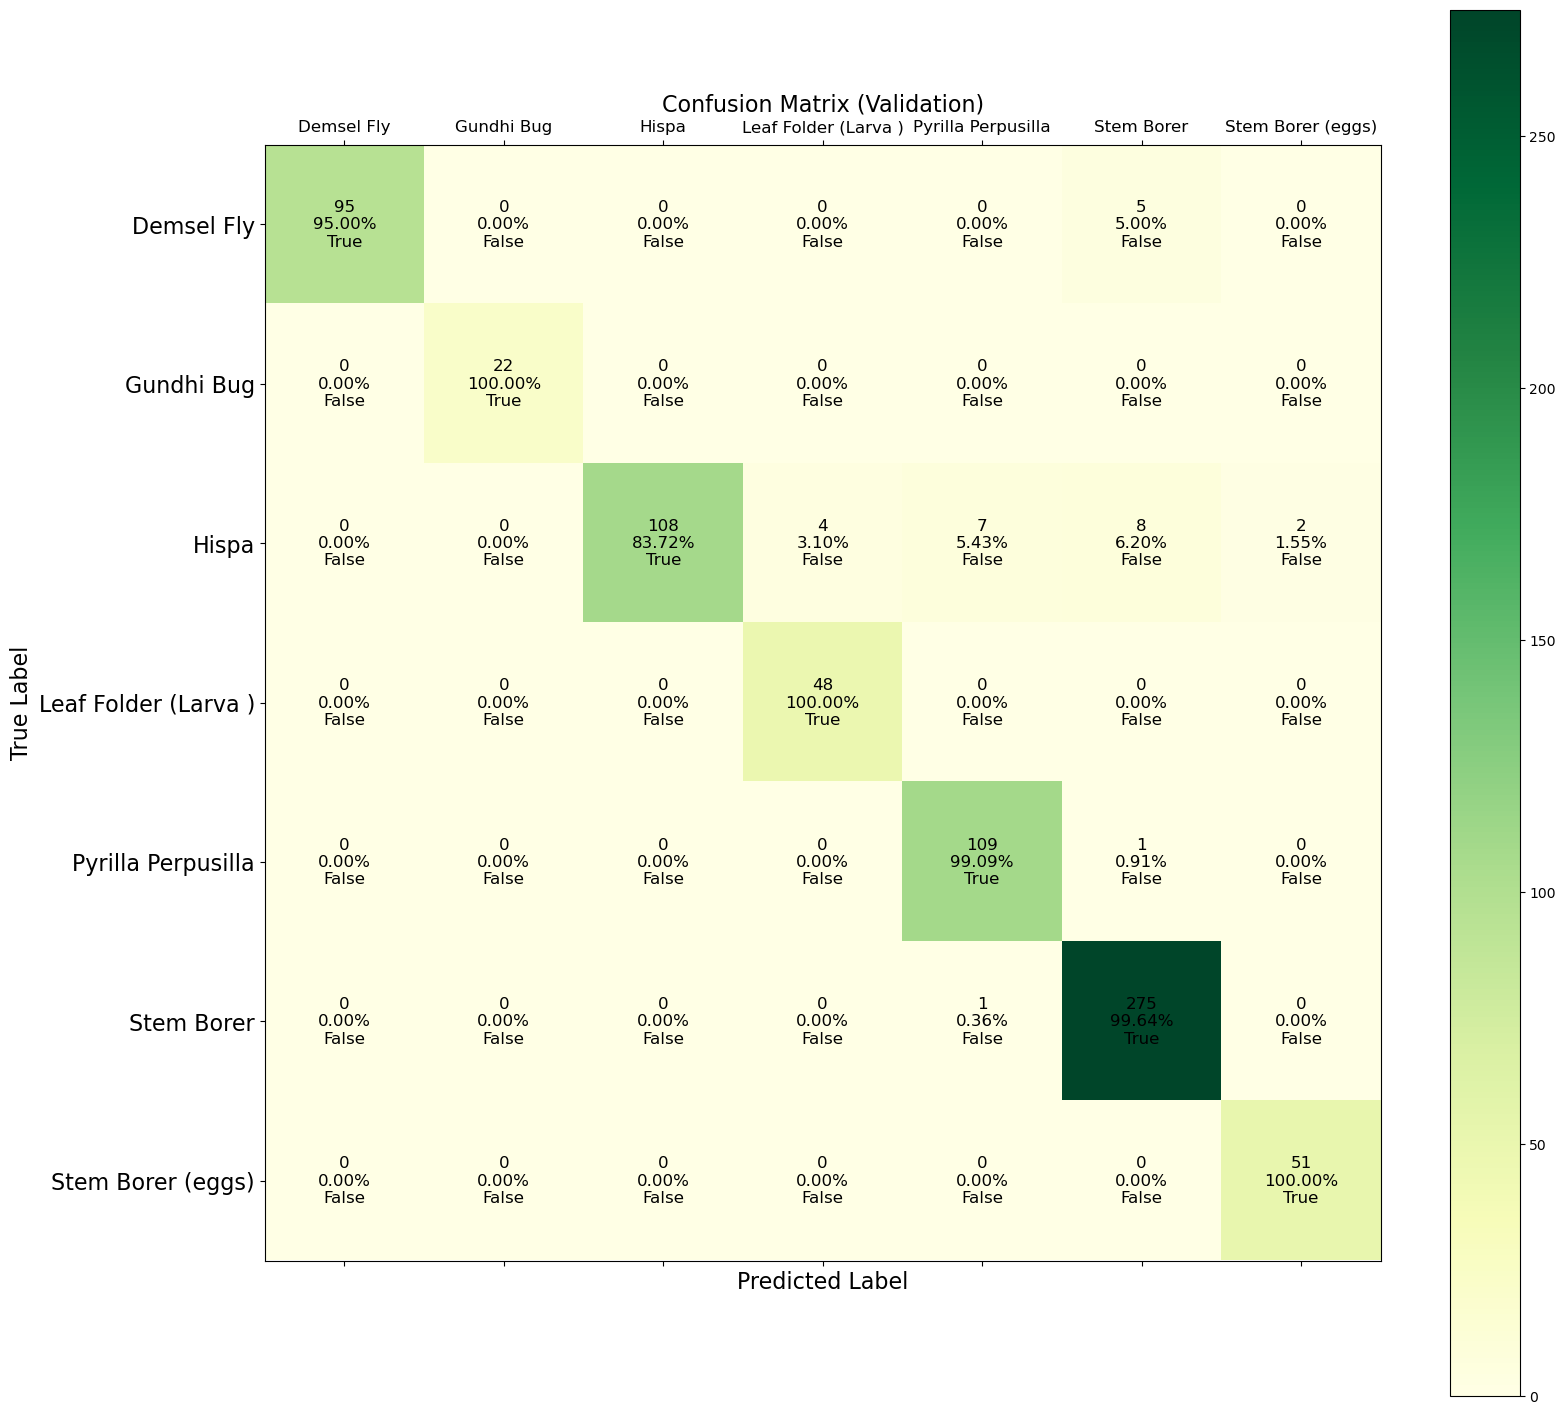

In [25]:
# Initialize empty lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset to obtain true and predicted labels
for images_batch, labels_batch in val_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch)  # Use labels directly without argmax
    y_pred.extend(np.argmax(batch_predictions, axis=1))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Map class indices to class names
class_names = ['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

# Calculate confidence percentages
confidence_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Map indices to class names for actual and predicted labels
y_true_names = [class_names[i] for i in y_true]
y_pred_names = [class_names[i] for i in y_pred]

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Actual Label': y_true_names,
    'Predicted Label': y_pred_names,
    'Confidence Percentage': [confidence_percentages[y, x] * 100 for x, y in zip(y_pred, y_true)],
    'Wrong Prediction': [1 if (true_label != pred_label) else 0 for true_label, pred_label in zip(y_true, y_pred)]
})

# Display the confusion matrix with gaps between class labels
fig, ax = plt.subplots(figsize=(18, 18))
cax = ax.matshow(conf_matrix, cmap=plt.cm.YlGn)

# Add a little gap between the axis ticks for better readability
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names,fontsize=12)
ax.set_yticklabels(class_names,fontsize=16)
plt.xticks(rotation=0, ha='center')

# Add numbers and confidence percentages to the matrix blocks
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = f'{conf_matrix[i, j]:.0f}\n{confidence_percentages[i, j]*100:.2f}%'
        if i == j:  # Correct prediction
            text += '\nTrue'
        else:
            text += '\nFalse'
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=12)

# Add colorbar
plt.colorbar(cax)

plt.title("Confusion Matrix (Validation)",fontsize=16)
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.savefig("EfficientNetB0_Rice_Pest_aug Confusion Matrix Validation", bbox_inches='tight', dpi=2000)
plt.show()

# Save the results to a CSV file
results_df.to_csv('Rice valid_results_EfficientNetB0_Pest_aug.csv', index=False)

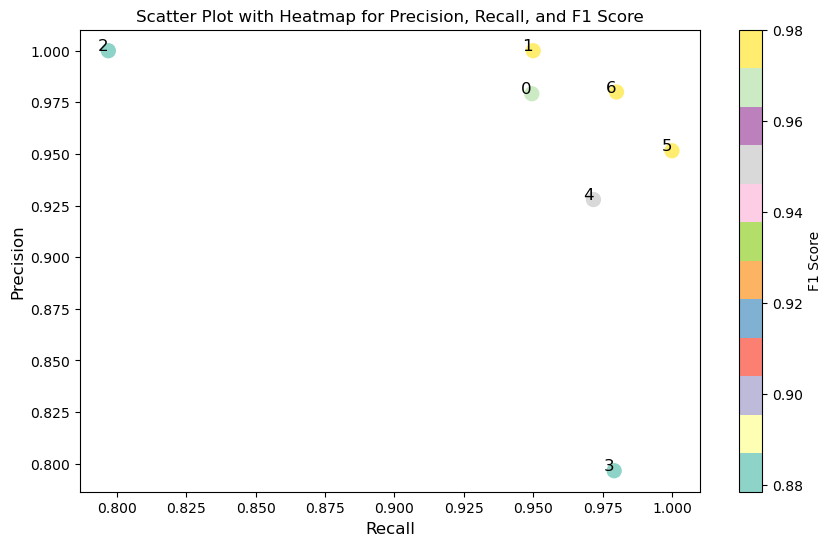

In [26]:
# Assuming recall, precision, and f1_score are already computed
# and class_names is a list of class names

# Create a mapping from class index to class name
class_mapping = {i: class_name for i, class_name in enumerate(class_names)}

# Create a scatter plot with heatmap and labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(recall, precision, c=f1_score, cmap='Set3', s=100)
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision',fontsize=12)
plt.colorbar(label='F1 Score')

# Add numbered labels for each point in the scatter plot
for i in range(len(class_names)):
    plt.text(recall[i], precision[i], str(i), fontsize=12, ha='right')

# Create a legend for the mapping of numbers to class names
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{i}: {class_name}',
                      markersize=10, markerfacecolor='gray') for i, class_name in class_mapping.items()]
#plt.legend(handles=handles, title='Class Mapping', bbox_to_anchor=(1.05, 1), loc='best')

plt.title('Scatter Plot with Heatmap for Precision, Recall, and F1 Score')
plt.savefig("EfficientNetB0_Rice_Pest_aug_Scatter_Plot_with_Heatmap_for_Precision_Recall_and_F1_Score1",bbox_inches='tight', dpi=2000)
plt.show()

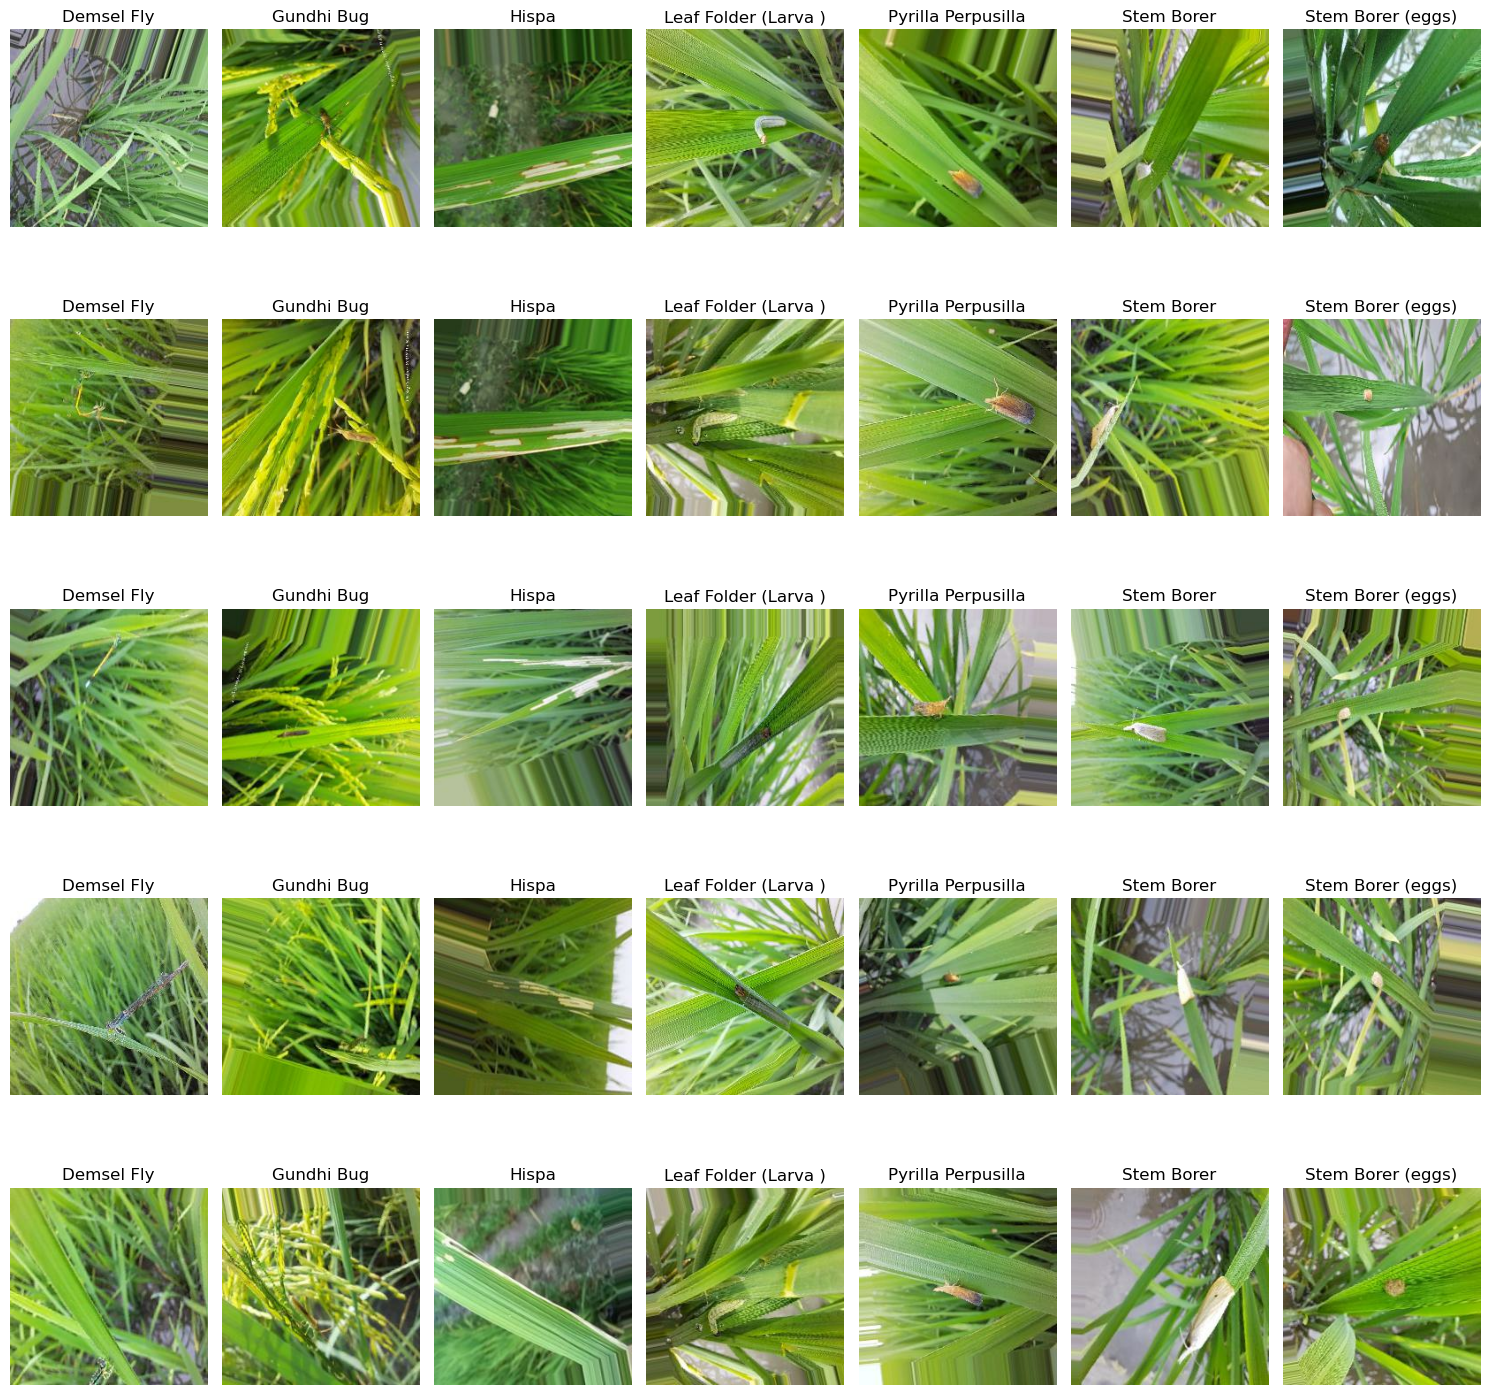

In [27]:
# Define the number of images to display for each class
num_images_per_class = 5

# Initialize counters to keep track of the number of images per class
class_counts = {class_name: 0 for class_name in class_names}

# Create a subplot grid
num_rows = num_images_per_class
num_cols = len(class_names)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate through the train_ds dataset
for images_batch, labels_batch in train_ds:
    for image, label in zip(images_batch, labels_batch):
        class_name = class_names[label.numpy()]
        if class_counts[class_name] < num_images_per_class:
            row = class_counts[class_name]
            col = class_names.index(class_name)
            ax = axs[row, col]
            ax.imshow(image.numpy().astype("uint8"))
            ax.set_title(class_name)
            ax.axis("off")
            class_counts[class_name] += 1

        # Check if all classes have reached the desired number of images
        if all(count == num_images_per_class for count in class_counts.values()):
            break

    # Check if all classes have reached the desired number of images
    if all(count == num_images_per_class for count in class_counts.values()):
        break

# Set class labels at the bottom
for ax, class_name in zip(axs[-1], class_names):
    ax.set_xlabel(class_name, fontsize=16)

plt.tight_layout()
plt.savefig("Rice_Pest Actual Images train set from each class", bbox_inches='tight', dpi=2000)
plt.show()